In [8]:
# Import data
import pandas as pd
file_path = "hasil_preprocessing1.xlsx"
df = pd.read_excel(file_path)
df.head()

,PENERBIT,JUDUL,content,date_final,SUMBER,Label,clean_text,content_clean,tokens,stopword_removal,rareword_removed
0,Detik,dirjen pajak ungkap kabar terbaru soal perbaik...,direktur jenderal (dirjen) pajak suryo utomo m...,Tidak ada tanggal,economic,positif,direktur jenderal pajak suryo utomo mengungka...,direktur jenderal pajak suryo utomo mengungkap...,"['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut..."
1,Detik,djp klaim aplikasi coretax mulai stabil digunakan,direktorat jenderal pajak (djp) kementerian ke...,25-03-2025,economic,netral,"rata berada di bawah , detik, dengan performa ...",rata berada di bawah detik dengan performa ter...,"['rata', 'berada', 'di', 'bawah', 'detik', 'de...","['rata', 'berada', 'bawah', 'detik', 'performa...","['rata', 'berada', 'bawah', 'detik', 'performa..."
2,DDTC,"latensi turun, djp klaim coretax system sudah ...","ilustrasi. jakarta, ddtcnews - ditjen pajak (d...",30-04-2025,local news,negatif,ditjen pajak menilai performa coretax adminis...,ditjen pajak menilai performa coretax administ...,"['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co..."
3,Detik,awas penipuan catut nama coretax! begini modus...,ditjen pajak (djp) kementerian keuangan (kemen...,Tidak ada tanggal,economic,negatif,akhir ini marak penipuan yang mengatasnamakan ...,akhir ini marak penipuan yang mengatasnamakan ...,"['akhir', 'ini', 'marak', 'penipuan', 'yang', ...","['akhir', 'marak', 'penipuan', 'mengatasnamaka...","['akhir', 'marak', 'penipuan', 'mengatasnamaka..."
4,Tempo,hari ini direktorat jenderal pajak rapat tertu...,scroll ke bawah untuk membaca berita baca be...,01-01-2025,local news,negatif,direktur jenderal atau dirjen pajak kementeria...,direktur jenderal atau dirjen pajak kementeria...,"['direktur', 'jenderal', 'atau', 'dirjen', 'pa...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k..."


## **Data Augmentation**

In [4]:
# Menghitung jumlah berdasarkan label
label_counts = df['Label'].value_counts()
label_counts

Label
netral     67
negatif    52
positif    35
Name: count, dtype: int64

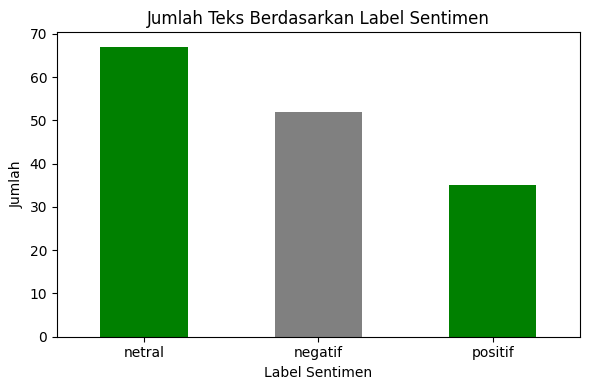

In [5]:
import matplotlib.pyplot as plt

# Visualisasi ke dalam diagram batang
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['green', 'gray'])
plt.title('Jumlah Teks Berdasarkan Label Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Menggunakan back translation

In [4]:
pip install googletrans==4.0.0-rc1

Using legacy 'setup.py install' for googletrans, since package 'wheel' is not installed.
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.7
    Uninstalling httpcore-1.0.7:
      Successfully uninstalled httpcore-1.0.7
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
    Running setup.py install for googletrans: started
    Running setup.py install for googletrans: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.3.5 requires httpx>=0.25.0, but you have httpx 0.13.3 which is incompatible.
You should consider upgrading via the 'e:\Pembelajaran\Semester_6\Natural Language Processing (NLP) PBA\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import time
from googletrans import Translator

# Inisialisasi translator
translator = Translator()

# Fungsi translate yang aman dan robust
def translate_to_english(text):
    if not isinstance(text, str) or pd.isna(text) or text.strip() == '':
        return text
    try:
        translated = translator.translate(text, src='id', dest='en')
        if translated and hasattr(translated, 'text') and translated.text:
            return translated.text
        else:
            print("  ⛔️ Gagal: hasil translate kosong atau None")
            return text
    except Exception as e:
        print(f"  ⛔️ Error saat translate: {e}")
        return text

# Target jumlah data per label (menyesuaikan jumlah netral = 67)
target_count = 67

# Pisahkan data berdasarkan label
df_pos = df[df['Label'] == 'positif'].copy()
df_neg = df[df['Label'] == 'negatif'].copy()
df_net = df[df['Label'] == 'netral'].copy()

# Bersihkan data kosong/null
df_pos = df_pos[df_pos['content'].notna() & (df_pos['content'].str.strip() != '')]
df_neg = df_neg[df_neg['content'].notna() & (df_neg['content'].str.strip() != '')]

# Hitung jumlah data yang perlu di-augmentasi (pastikan int)
n_pos_aug = int(target_count - len(df_pos))
n_neg_aug = int(target_count - len(df_neg))

# Siapkan frame kosong jika tidak perlu augmentasi
df_pos_aug = pd.DataFrame(columns=df.columns)
df_neg_aug = pd.DataFrame(columns=df.columns)

# Proses augmentasi POSITIF
if n_pos_aug > 0:
    replace_pos = n_pos_aug > len(df_pos)
    df_pos_sample = df_pos.sample(n=n_pos_aug, replace=replace_pos, random_state=42)
    df_pos_aug = df_pos_sample.copy()
    df_pos_aug['content'] = df_pos_aug['content'].astype(str)
    df_pos_aug['augmentasi'] = True

    print("📦 Translating data POSITIF (augmentasi)...")
    for i in df_pos_aug.index:
        print(f"  → Positif ke-{i}")
        df_pos_aug.loc[i, 'content'] = translate_to_english(df_pos_aug.loc[i, 'content'])
        time.sleep(2)

# Proses augmentasi NEGATIF
if n_neg_aug > 0:
    replace_neg = n_neg_aug > len(df_neg)
    df_neg_sample = df_neg.sample(n=n_neg_aug, replace=replace_neg, random_state=42)
    df_neg_aug = df_neg_sample.copy()
    df_neg_aug['content'] = df_neg_aug['content'].astype(str)
    df_neg_aug['augmentasi'] = True

    print("\n📦 Translating data NEGATIF (augmentasi)...")
    for i in df_neg_aug.index:
        print(f"  → Negatif ke-{i}")
        df_neg_aug.loc[i, 'content'] = translate_to_english(df_neg_aug.loc[i, 'content'])
        time.sleep(2)

# Tandai data asli
df['augmentasi'] = False

# Gabungkan semua data
df_augmented = pd.concat([df, df_pos_aug, df_neg_aug], ignore_index=True)

# Tampilkan distribusi label
print("\n📊 Distribusi Label Setelah Augmentasi:")
print(df_augmented['Label'].value_counts())


📦 Translating data POSITIF (augmentasi)...
  → Positif ke-140
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
  → Positif ke-53
  → Positif ke-136
  → Positif ke-112
  → Positif ke-71
  → Positif ke-148
  → Positif ke-85
  → Positif ke-41
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
  → Positif ke-26
  → Positif ke-73
  → Positif ke-30
  → Positif ke-152
  → Positif ke-0
  → Positif ke-15
  → Positif ke-80
  → Positif ke-146
  → Positif ke-16
  → Positif ke-38
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
  → Positif ke-5
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
  → Positif ke-10
  → Positif ke-151
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
  → Positif ke-14
  → Positif ke-149
  → Positif ke-135
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearra

In [8]:
# Tampilkan distribusi label
print("\n📊 Distribusi Label Setelah Augmentasi:")
print(df_augmented['Label'].value_counts())


📊 Distribusi Label Setelah Augmentasi:
Label
positif    67
netral     67
negatif    67
Name: count, dtype: int64


In [ ]:
# # Cek selisih jumlah
# target_jumlah = 67

# # Oversample NEGATIF agar jadi 67
# df_neg_sampled = df_augmented[df_augmented['Label'] == 'Negatif']
# df_neg_oversampled = df_neg_sampled.sample(target_jumlah - len(df_neg_sampled), replace=True, random_state=42)

# # Gabungkan ke dataset utama
# df_final = pd.concat([df_augmented, df_neg_oversampled], ignore_index=True)

# # Cek distribusi akhir
# print("\n✅ Distribusi Akhir Setelah Oversampling:")
# print(df_final['Label'].value_counts())


In [ ]:
# print(df_final['Label'].value_counts())

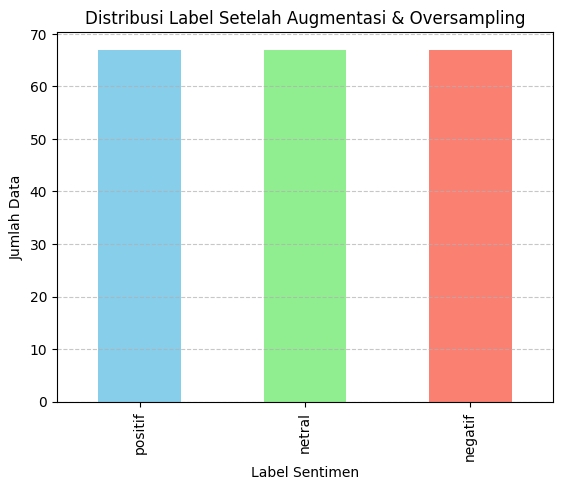

In [9]:
import matplotlib.pyplot as plt

df_augmented['Label'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Distribusi Label Setelah Augmentasi & Oversampling")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Data")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
df_augmented = df_augmented.drop("augmentasi", axis=1)

In [11]:
df_augmented

,PENERBIT,JUDUL,content,date_final,SUMBER,Label,clean_text,content_clean,tokens,stopword_removal,rareword_removed
0,Detik,dirjen pajak ungkap kabar terbaru soal perbaik...,direktur jenderal (dirjen) pajak suryo utomo m...,Tidak ada tanggal,economic,positif,direktur jenderal pajak suryo utomo mengungka...,direktur jenderal pajak suryo utomo mengungkap...,"['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut..."
1,Detik,djp klaim aplikasi coretax mulai stabil digunakan,direktorat jenderal pajak (djp) kementerian ke...,25-03-2025,economic,netral,"rata berada di bawah , detik, dengan performa ...",rata berada di bawah detik dengan performa ter...,"['rata', 'berada', 'di', 'bawah', 'detik', 'de...","['rata', 'berada', 'bawah', 'detik', 'performa...","['rata', 'berada', 'bawah', 'detik', 'performa..."
2,DDTC,"latensi turun, djp klaim coretax system sudah ...","ilustrasi. jakarta, ddtcnews - ditjen pajak (d...",30-04-2025,local news,negatif,ditjen pajak menilai performa coretax adminis...,ditjen pajak menilai performa coretax administ...,"['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co..."
3,Detik,awas penipuan catut nama coretax! begini modus...,ditjen pajak (djp) kementerian keuangan (kemen...,Tidak ada tanggal,economic,negatif,akhir ini marak penipuan yang mengatasnamakan ...,akhir ini marak penipuan yang mengatasnamakan ...,"['akhir', 'ini', 'marak', 'penipuan', 'yang', ...","['akhir', 'marak', 'penipuan', 'mengatasnamaka...","['akhir', 'marak', 'penipuan', 'mengatasnamaka..."
4,Tempo,hari ini direktorat jenderal pajak rapat tertu...,scroll ke bawah untuk membaca berita baca be...,01-01-2025,local news,negatif,direktur jenderal atau dirjen pajak kementeria...,direktur jenderal atau dirjen pajak kementeria...,"['direktur', 'jenderal', 'atau', 'dirjen', 'pa...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k..."
...,...,...,...,...,...,...,...,...,...,...,...
196,CNN,jeblok setoran pajak gara-gara coretax dan keb...,"Jakarta, CNBC Indonesia-Directorate General of...",28-02-2025,opinion,negatif,direktorat jenderal pajak kementerian keuanga...,direktorat jenderal pajak kementerian keuangan...,"['direktorat', 'jenderal', 'pajak', 'kementeri...","['direktorat', 'jenderal', 'pajak', 'kementeri...","['direktorat', 'jenderal', 'pajak', 'kementeri..."
197,CNBC,praktisi pajak ungkap perbaikan coretax belum ...,kompas.com - sistem coretax yang dirilis pemer...,01-01-2025,local news,negatif,sistem coretax yang dirilis pemerintah pada j...,sistem coretax yang dirilis pemerintah pada ja...,"['sistem', 'coretax', 'yang', 'dirilis', 'peme...","['sistem', 'coretax', 'dirilis', 'pemerintah',...","['sistem', 'coretax', 'dirilis', 'pemerintah',..."
198,Hukum Online,"kantor hukum keluhkan kendala coretax, ganggu ...",The best legal learning platforms online with ...,Tidak ada tanggal,local news,negatif,undangan dan isu hukum terkini solusi hukum da...,undangan dan isu hukum terkini solusi hukum da...,"['undangan', 'dan', 'isu', 'hukum', 'terkini',...","['undangan', 'hukum', 'terkini', 'solusi', 'hu...","['undangan', 'hukum', 'terkini', 'solusi', 'hu..."
199,Bisnis,"dugaan korupsi coretax, dpr sebut belum ada re...",Comfortable without advertisements.Business su...,01-01-2025,economic,negatif,wakil menteri keuangan anggito abimanyu mengkl...,wakil menteri keuangan anggito abimanyu mengkl...,"['wakil', 'menteri', 'keuangan', 'anggito', 'a...","['wakil', 'menteri', 'keuangan', 'anggito', 'a...","['wakil', 'menteri', 'keuangan', 'anggito', 'a..."


In [13]:
from googletrans import Translator
import time

translator = Translator()

def translate_to_indonesian(text):
    if not text or not isinstance(text, str) or text.strip() == '':
        return None  # Ubah return jadi None supaya bisa dihapus

    try:
        translated = translator.translate(text, src='en', dest='id')
        if translated is not None and hasattr(translated, 'text') and translated.text:
            return translated.text
        else:
            print("  ⛔️ Gagal: hasil translate kosong atau None")
            return None
    except Exception as e:
        print(f"  ⛔️ Error saat translate: {e}")
        return None

# Copy agar tidak merusak df_final asli
df_final_translated = df_augmented.copy()

# Filter baris yang Label-nya Positif atau Negatif
filter_pos_neg = df_final_translated['Label'].isin(['positif', 'negatif'])

print("📦 Translating content ke Bahasa Indonesia untuk label Positif & Negatif...")

rows_to_drop = []

for i, row in df_final_translated[filter_pos_neg].iterrows():
    print(f"  → Baris ke-{i} (Label: {row['Label']})")
    hasil = translate_to_indonesian(row['content'])
    if hasil is None:
        print(f"    ❌ Menghapus baris ke-{i} karena gagal translate")
        rows_to_drop.append(i)
    else:
        df_final_translated.at[i, 'content'] = hasil
    time.sleep(2)  # Delay supaya tidak kena rate limit

# Hapus baris yang gagal translate
df_final_translated.drop(index=rows_to_drop, inplace=True)

print("✅ Translasi selesai.")
print(f"🗑️ Jumlah baris dihapus karena gagal translate: {len(rows_to_drop)}")


📦 Translating content ke Bahasa Indonesia untuk label Positif & Negatif...
  → Baris ke-0 (Label: positif)
  → Baris ke-2 (Label: negatif)
  → Baris ke-3 (Label: negatif)
  → Baris ke-4 (Label: negatif)
  → Baris ke-5 (Label: positif)
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
    ❌ Menghapus baris ke-5 karena gagal translate
  → Baris ke-9 (Label: negatif)
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
    ❌ Menghapus baris ke-9 karena gagal translate
  → Baris ke-10 (Label: positif)
  → Baris ke-12 (Label: negatif)
  ⛔️ Error saat translate: the JSON object must be str, bytes or bytearray, not NoneType
    ❌ Menghapus baris ke-12 karena gagal translate
  → Baris ke-14 (Label: positif)
  → Baris ke-15 (Label: positif)
  → Baris ke-16 (Label: positif)
  → Baris ke-20 (Label: positif)
  → Baris ke-21 (Label: negatif)
  → Baris ke-24 (Label: positif)
  ⛔️ Error saat translate: the JSON object must be 

In [14]:
df_final_translated

,PENERBIT,JUDUL,content,date_final,SUMBER,Label,clean_text,content_clean,tokens,stopword_removal,rareword_removed
0,Detik,dirjen pajak ungkap kabar terbaru soal perbaik...,Direktur Jenderal (Dirjen) Pukak Suryo Utomo M...,Tidak ada tanggal,economic,positif,direktur jenderal pajak suryo utomo mengungka...,direktur jenderal pajak suryo utomo mengungkap...,"['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut..."
1,Detik,djp klaim aplikasi coretax mulai stabil digunakan,direktorat jenderal pajak (djp) kementerian ke...,25-03-2025,economic,netral,"rata berada di bawah , detik, dengan performa ...",rata berada di bawah detik dengan performa ter...,"['rata', 'berada', 'di', 'bawah', 'detik', 'de...","['rata', 'berada', 'bawah', 'detik', 'performa...","['rata', 'berada', 'bawah', 'detik', 'performa..."
2,DDTC,"latensi turun, djp klaim coretax system sudah ...","ilustrasi.Jakarta, Ddtcnews - Ditjen Pajak (DJ...",30-04-2025,local news,negatif,ditjen pajak menilai performa coretax adminis...,ditjen pajak menilai performa coretax administ...,"['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co..."
3,Detik,awas penipuan catut nama coretax! begini modus...,Ditjen Pajak (DJP) KEMENTERIAN KEUIGAN (KEMENK...,Tidak ada tanggal,economic,negatif,akhir ini marak penipuan yang mengatasnamakan ...,akhir ini marak penipuan yang mengatasnamakan ...,"['akhir', 'ini', 'marak', 'penipuan', 'yang', ...","['akhir', 'marak', 'penipuan', 'mengatasnamaka...","['akhir', 'marak', 'penipuan', 'mengatasnamaka..."
4,Tempo,hari ini direktorat jenderal pajak rapat tertu...,Gulir Ke Bawah UNTUK BEMACA BERITA BACA BERITA...,01-01-2025,local news,negatif,direktur jenderal atau dirjen pajak kementeria...,direktur jenderal atau dirjen pajak kementeria...,"['direktur', 'jenderal', 'atau', 'dirjen', 'pa...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k..."
...,...,...,...,...,...,...,...,...,...,...,...
193,NTVNews,"banyak dikeluhkan warga, apa tujuan sebenarnya...","Serang, Pusat Pajak Fakultas Ekonomi dan Bisni...",08-01-2025,local news,negatif,"ing ir. asep ridwan, s.t., mt., ipu yang menek...",ing ir asep ridwan s t mt ipu yang menekankan ...,"['ing', 'ir', 'asep', 'ridwan', 's', 't', 'mt'...","['asep', 'ridwan', 'menekankan', 'pentingnya',...","['asep', 'ridwan', 'menekankan', 'pentingnya',..."
195,katadata,"coretax masih bermasalah, ditjen pajak akan gu...","Untuk masuk dan mendaftar, kami akan menunjuk ...",01-01-2025,local news,negatif,"pajak lain yang terhutang, sulit juga melaksan...",pajak lain yang terhutang sulit juga melaksana...,"['pajak', 'lain', 'yang', 'terhutang', 'sulit'...","['pajak', 'terhutang', 'sulit', 'melaksanakan'...","['pajak', 'sulit', 'melaksanakan', 'kewajiban'..."
196,CNN,jeblok setoran pajak gara-gara coretax dan keb...,"Jakarta, CNBC Indonesia-Directorate General of...",28-02-2025,opinion,negatif,direktorat jenderal pajak kementerian keuanga...,direktorat jenderal pajak kementerian keuangan...,"['direktorat', 'jenderal', 'pajak', 'kementeri...","['direktorat', 'jenderal', 'pajak', 'kementeri...","['direktorat', 'jenderal', 'pajak', 'kementeri..."
198,Hukum Online,"kantor hukum keluhkan kendala coretax, ganggu ...",The best legal learning platforms online with ...,Tidak ada tanggal,local news,negatif,undangan dan isu hukum terkini solusi hukum da...,undangan dan isu hukum terkini solusi hukum da...,"['undangan', 'dan', 'isu', 'hukum', 'terkini',...","['undangan', 'hukum', 'terkini', 'solusi', 'hu...","['undangan', 'hukum', 'terkini', 'solusi', 'hu..."


In [15]:
print(df_final_translated['Label'].value_counts())

Label
netral     67
negatif    52
positif    51
Name: count, dtype: int64


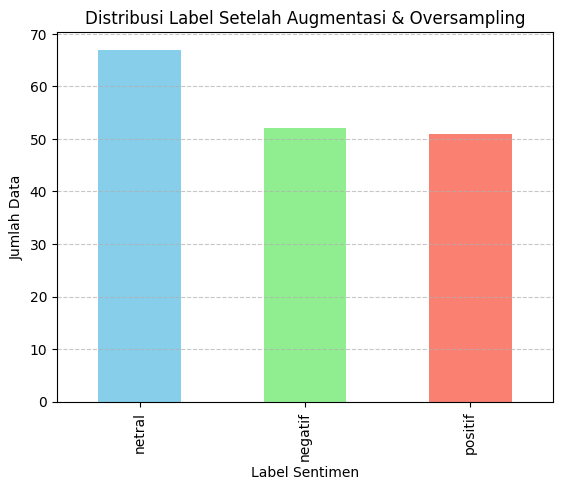

In [16]:
import matplotlib.pyplot as plt

df_final_translated['Label'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Distribusi Label Setelah Augmentasi & Oversampling")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Data")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ini sudah termasuk dataset seimbang secara praktis untuk banyak kasus. Model biasanya bisa belajar dengan baik tanpa bias signifikan ke kelas tertentu.